#  Analysis Introduction

In this analysis, I delve into a detailed data set on bicycle rentals in Chicago, with the goal of building a predictive model that improves the strategic planning and operational efficiency of the city's bike-sharing system. Using a variety of regression techniques and machine learning methodologies-including linear OLS regression, Lasso regression, Ridge regression, Elastic Net regression, K-Nearest Neighbors, and Decision Tree Regressor-I intend to explore the different factors that determine bicycle rental demand. The main challenge faced by this dataset concerns the prediction of bicycle rental demand on a given day, taking into account variables such as seasonal changes, weather conditions, holidays, etc. This comprehensive study is bound to unearth crucial insights into the factors driving bicycle rental trends in Chicago.



# Package and Dataset Imports

In [342]:
# Importing necessary libraries for data manipulation, visualization, and machine learning
import matplotlib.pyplot as plt                        # For creating plots and charts
import pandas as pd                                    # For handling dataframes
import seaborn as sns                                  # For advanced visualization
from sklearn.model_selection import train_test_split   # For splitting the data into train and test sets
from sklearn.tree import DecisionTreeRegressor         # Machine learning model for regression
from sklearn.tree import plot_tree                     # For visualizing the decision trees
from sklearn.model_selection import RandomizedSearchCV # For tuning model hyperparameters
import sklearn.linear_model                            # For various linear models
from sklearn.linear_model import LinearRegression      # For performing linear regression
from sklearn.linear_model import Lasso                 # For Lasso regression, which is a type of linear regression that includes regularization
from sklearn.tree import DecisionTreeRegressor         # For using regression tree models
from sklearn.neighbors import KNeighborsRegressor      # For using k-nearest neighbors regression
from sklearn.preprocessing import StandardScaler       # For scaling features to a standard range
from sklearn import neighbors                          # For using nearest neighbors' models
import warnings                                        # For controlling warnings
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Configuring pandas to display a large number of rows and columns, which is useful for inspecting large datasets
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Suppressing warnings to ensure a cleaner output
warnings.filterwarnings(action = 'ignore')

In [343]:
# Specifying the file path and name for the training dataset
train_file = './train.xlsx'  

# Reading the Excel file into a pandas DataFrame
train_df = pd.read_excel(io = train_file, header = 0)  

# Exploratory Data Analysis and Data Preprocessing

## Exploratory Data Analysis
Descriptive statistics, histograms, correlation, etc.

In [344]:
# Displaying the size of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {train_df.shape[0]} 

Features (columns) : {train_df.shape[1]}
""")


Size of Original Dataset
------------------------
Observations (rows): 1638 

Features (columns) : 13



In [345]:
# Getting an informative summary of the DataFrame
train_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638 entries, 0 to 1637
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1638 non-null   object 
 1   DateHour                1638 non-null   object 
 2   Temperature(F)          1638 non-null   int64  
 3   Humidity(%)             1638 non-null   int64  
 4   Wind speed (mph)        1638 non-null   float64
 5   Visibility(miles)       1575 non-null   float64
 6   DewPointTemperature(F)  1587 non-null   float64
 7   Rainfall(in)            1638 non-null   float64
 8   Snowfall(in)            1638 non-null   float64
 9   SolarRadiation(MJ/m2)   1558 non-null   float64
 10  Holiday                 1638 non-null   object 
 11  FunctioningDay          1638 non-null   object 
 12  RENTALS                 1638 non-null   int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 166.5+ KB


In [346]:
# Display the first five rows of the Dataframe
train_df.head()

,ID,DateHour,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),Holiday,FunctioningDay,RENTALS
0,mb_1039,2023-10-14 05:59:54.810000,52,81,0.4,2.9,46.4,0.0,0.0,0.00,No,Yes,519
1,mb_1330,2023-10-26 08:59:53.355000,51,53,2.2,NaN,35.2,0.0,0.0,1.01,No,Yes,1251
2,mb_551,2023-09-23 21:59:57.250000,56,49,2.5,3.4,38.8,0.0,0.0,0.00,No,Yes,1685
3,mb_2103,2023-12-19 14:00:00,69,32,9.8,12.4,38.7,0.0,0.0,2.36,No,No,0
4,mb_1430,2023-10-30 12:59:52.855000,53,20,2.9,10.8,12.9,0.0,0.0,1.96,No,Yes,814


In [347]:
# Using .describe() to get the descriptive statistics for numeric data in the DataFrame
bike_stats = train_df.describe(include = 'number').round(decimals = 2)

# Checking the results of the descriptive statistics
bike_stats

,Temperature(F),Humidity(%),Wind speed (mph),Visibility(miles),DewPointTemperature(F),Rainfall(in),Snowfall(in),SolarRadiation(MJ/m2),RENTALS
count,1638.00,1638.00,1638.00,1575.00,1587.00,1638.00,1638.00,1558.00,1638.00
mean,57.34,59.03,3.36,9.60,41.85,0.00,0.00,0.54,828.15
std,12.92,18.56,2.08,3.51,14.04,0.04,0.02,0.81,657.60
min,26.00,13.00,0.00,0.00,-2.20,0.00,0.00,0.00,0.00
25%,47.00,44.00,1.80,7.30,33.30,0.00,0.00,0.00,241.50
50%,57.00,59.00,2.90,11.60,41.90,0.00,0.00,0.00,761.50
75%,67.75,73.00,4.50,12.40,51.40,0.00,0.00,0.96,1203.75
max,91.00,97.00,12.80,12.40,71.60,0.71,0.30,3.18,3303.00


In the pursuit of crafting an efficient predictive model for bike rentals, I turned to the descriptive statistics of the dataset to gain a foundational understanding of the variables at play. The descriptive statistics provided a snapshot of central tendencies, dispersion, and the range of the numerical data, which are instrumental in shaping my feature engineering strategy.

- The average temperature was around 57.34°F, with a broad range from a low of 26°F to a high of 91°F. This variance in temperature is critical, as it affects the comfort of potential riders, and therefore, the likelihood of bike rentals. Given the standard deviation of 12.92, it was clear that the temperature in Chicago is quite variable, reinforcing the need to consider temperature as a categorical feature in my model to capture these fluctuations.

- Humidity, averaging at 59.03%, had a wide range as well, stretching from a dry 13% to a very humid 97%. The standard deviation of 18.56 indicated variability, justifying its inclusion as a categorical feature in my model to reflect the impact of comfort levels on rental behavior.

- Wind speed, with an average of 3.36 mph and a maximum of 12.80 mph, suggested generally mild conditions but with instances of stronger winds. The wind could influence rider comfort and safety, making it a potentially significant predictor in my model.

- Visibility averaged 9.60 miles but was missing some data, indicating that there may be times when poor visibility could affect rental decisions. The average Dew Point Temperature was around 41.85°F, which provided insight into the atmospheric moisture content, another comfort factor for riders.

- Rainfall and snowfall both showed very low averages and relatively low maximums, suggesting that extreme weather is not common but can have a high impact when it does occur. These variables would likely serve as binary indicators in my model, signifying the presence or absence of these conditions.

- Solar radiation, with an average of 0.54 MJ/m2, indicated varying levels of sunlight exposure, which could correlate with the desirability of outdoor activities like biking.

- Finally, the average number of rentals was 828.15, but with a considerable standard deviation of 657.60 and a range up to 3303 rentals, indicating a highly variable demand.


In [348]:
# Counting the occurrences of each unique value in the 'Holiday' column
# This helps to understand the distribution of holiday vs. non-holiday in the dataset
holiday_counts = train_df['Holiday'].value_counts()

# Display the counts of each unique value in the 'Holiday' column
holiday_counts

Holiday
No     1552
Yes      86
Name: count, dtype: int64

In [ ]:
# Counting the occurrences of each unique value in the 'FunctioningDay' column
# This is to assess how many days the system was operational vs. non-operational
functioning_day_counts = train_df['FunctioningDay'].value_counts()

# Displaying the counts of each unique value in the 'FunctioningDay' column
functioning_day_counts

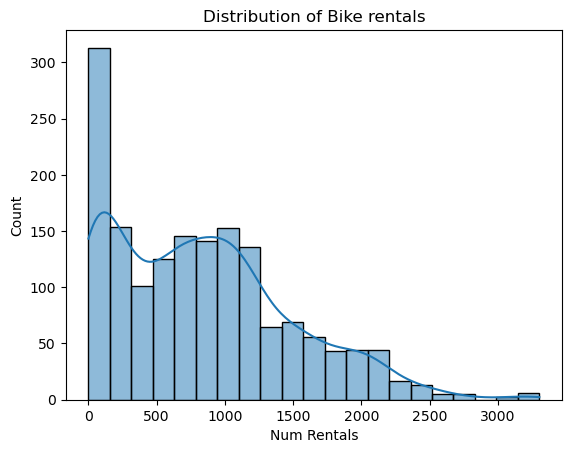

In [349]:
# Developing a histogram for the 'RENTALS' column from the train_df DataFrame
# The 'kde=True' argument adds a Kernel Density Estimate overlay to smooth the distribution
sns.histplot(data   = train_df,
             x      = 'RENTALS',
             kde    = True)

# Adding a title and axis labels to the plot for clarity and presentation
# 'label' specifies the text of the title, 'xlabel' and 'ylabel' specify the labels for the x and y-axis respectively
plt.title(label   = "Distribution of Bike rentals")
plt.xlabel(xlabel = "Num Rentals") # Custom label to make the x-axis more understandable
plt.ylabel(ylabel = "Count")       # Y-axis label to denote the frequency of rental counts

# Displaying the histogram with all the specified details
plt.show()


The first histogram I created—titled "Distribution of Bike Rentals"—provides a detailed examination of the distribution of bicycle rentals, crucial for understanding their usage patterns at different times. I utilized Kernel Density Estimation (KDE) to smooth out the distribution, thereby making the underlying trends more apparent. This visualization offered several key insights:
- I noticed that most bicycle rental counts tend to be concentrated at the lower end, suggesting that it is more common for fewer bicycles to be rented than for larger fleets. This observation is crucial for understanding user behaviour and rental dynamics.
- The data shows a rightward slope, indicating that although the majority of rentals are fewer bicycles, there are distinct periods characterised by significantly higher rental activity. This pattern underlines the variability of rental demand.
- A long pronounced tail extending to the right caught my attention, indicating abnormal or exceptional cases where the number of rentals spikes, perhaps due to special events or particularly favourable weather conditions.
- The peak of the KDE curve reveals the mode of bicycle rental, showing the most frequent number of bicycles rented at the same time. This information is crucial for understanding the most common user needs.


In [ ]:
# Generating a histogram to analyze the distribution of temperatures within the dataset
# Utilizing the Kernel Density Estimate (KDE) to overlay a smooth curve that highlights the distribution pattern
sns.histplot(data   = train_df,
             x      = 'Temperature(F)',
             kde    = True)

# Setting the title and labels for better readability and interpretation of the plot
plt.title("Temperature Distribution in the Dataset")  # Clearly defines the plot's focus
plt.xlabel("Temperature (°F)")  # Indicates the measurement unit for clarity
plt.ylabel("Num data points")  # Specifies what the y-axis represents

# Displaying the finalized histogram with the KDE, offering insights into temperature variation
plt.show()


The histogram I developed, titled "Temperature Distribution in the DataSet," was critical for analyzing the range and frequency of temperature points within the data set. This graphical representation was key to understanding how temperature fluctuations could potentially affect bicycle rental patterns.

Analyzing the histogram, a bell curve emerged showing a normal distribution of temperatures, with most of the data points clustering around the median range. This central trend indicates that moderate temperatures are the most common, suggesting a potential correlation between these temperatures and average bicycle rental volumes.

The tails of the curve taper toward the extremes of the temperature spectrum, implying fewer instances of very high or very low temperatures. These outliers could represent days with unusual weather conditions, which could increase or decrease users' willingness to rent bicycles, depending on whether such temperatures are perceived as comfortable for outdoor activities.

In addition, Kernel Density Estimation (KDE) superposition provided a smooth curve on the bars of the histogram, clarifying the trend of the temperature distribution. This smoothed curve allowed me to visualize potential temperature peaks more clearly.





In [350]:
# Dropping non-numeric columns to focus on numeric correlations
# This creates a new DataFrame 'numeric_df' by removing specified columns that are not relevant to numeric correlation analysis
numeric_df = train_df.drop(columns = ['ID', 'DateHour', 'Holiday', 'FunctioningDay'])

# Calculating Pearson correlation coefficient between numeric features
numeric_corr = numeric_df.corr(method = 'pearson') # a statistical measure that expresses the extent of a linear relationship between variables.

# Isolating the 'RENTALS' column to see how other variables correlate with bike rentals
# Results are rounded to two decimal places for readability and sorted in descending order to highlight strong positive correlations first
rentals_corr = numeric_corr.loc[ : , 'RENTALS'].round(decimals = 2).sort_values(ascending = False)

# Displaying the sorted correlation values for 'RENTALS' with other numeric features
rentals_corr


RENTALS                   1.00
Temperature(F)            0.32
SolarRadiation(MJ/m2)     0.21
Wind speed (mph)          0.19
DewPointTemperature(F)    0.03
Visibility(miles)         0.00
Snowfall(in)             -0.09
Rainfall(in)             -0.15
Humidity(%)              -0.40
Name: RENTALS, dtype: float64

In my pursuit to understand the factors affecting bike rental demand in Chicago, I conducted a correlation analysis, focusing on how different numerical features relate to bike rentals. To ensure clarity in my investigation, I first refined my dataset by removing non-numeric columns such as 'ID', 'DateHour', 'Holiday', and 'FunctioningDay', as they do not contribute to numerical correlations.

Once I had a dataset comprised purely of quantitative factors, I calculated the Pearson correlation coefficients. This method was particularly chosen for its effectiveness in numerical data analysis.

- The correlation analysis revealed that temperature had the strongest positive correlation with bike rentals, with a coefficient of 0.32. This implies a moderate relationship, indicating that as temperatures rise, so too does the likelihood of renting bikes. This relationship likely reflects the comfort of riding in warmer weather.

- Solar radiation also showed a positive correlation, albeit weaker, with a coefficient of 0.21. This suggests that sunnier conditions, which typically lead to more outdoor activities, might have a favorable impact on bike rental numbers.

- Conversely, humidity was negatively correlated with bike rentals, having a coefficient of -0.40. This finding resonates with the common understanding that higher humidity levels can deter outdoor activities due to discomfort, potentially leading to decreased bike rental demand.

- The analysis revealed that factors such as visibility, snowfall, and precipitation have minimal or low correlations with bicycle rental. This observation is interesting, especially regarding precipitation, which showed an unexpectedly low negative correlation. This suggests that rain may not significantly discourage bicycle rentals, but probably because of the limited instances of rain and snow in the dataset. 



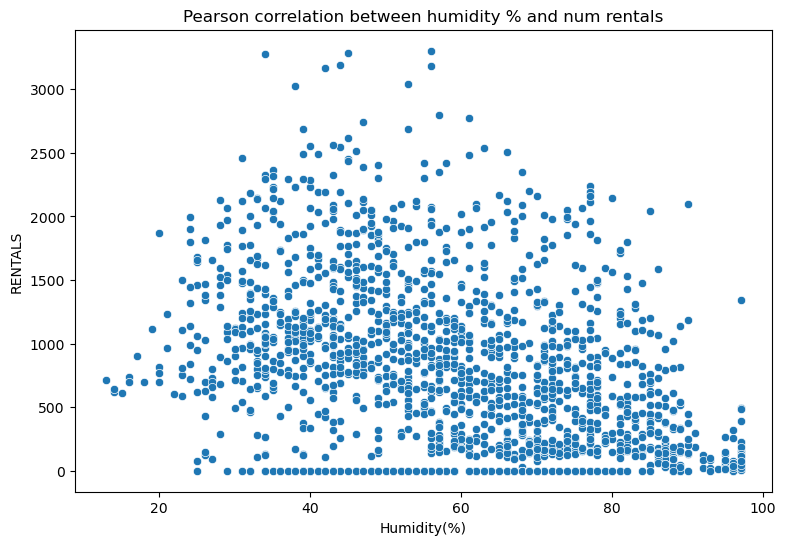

In [351]:
# Setting the size of the figure for the scatterplot using 'figsize' that determines the width and height of the figure in inches
fig, ax = plt.subplots(figsize = (9, 6))

# Developing a scatterplot with 'Humidity(%)' on the x-axis and 'RENTALS' on the y-axis
# This visualizes the relationship between humidity levels and the number of bike rentals
sns.scatterplot(x    = 'Humidity(%)',
                y    = 'RENTALS',
                data = train_df)

# Adding a title to the scatterplot for better understanding of the plot's purpose
plt.title('Pearson correlation between humidity % and num rentals')

# Displaying the scatterplot on the screen
plt.show()


After examining the scatter plot illustrating the relationship between humidity levels and the number of bicycle rentals, I undertook an in-depth analysis to understand the nature of their correlation. The graph revealed a distribution of data points with no clear linear trend. This suggests that the relationship between humidity and bicycle rentals is potentially more complex than a simple linear correlation might indicate. The hypotheses I formulated were as follows:

- The graph showed that the number of rentals varies greatly with humidity levels. At lower humidity levels, the number of rentals varies significantly, with no clear tendency for an increase or decrease in bicycle rentals to directly correspond to higher or lower humidity levels. Similarly, at higher humidity levels, no consistent pattern emerged indicating a direct impact on rental behaviour.

- What caught my attention was the group of data points at the lower end of the rental count, which remained dense across all humidity levels. This could mean that, regardless of humidity, a basic level of rental activity is maintained. On the other hand, the scarcity of data points at higher rental counts across the humidity spectrum suggests that days with exceptionally high rental counts are less frequent and are not strongly correlated with humidity.

- The lack of a discernible downward or upward trend in the scatter plot indicates the possibility that factors other than humidity have a greater influence on the number of rentals. It could also mean that humidity interacts with other variables in influencing the frequency of rentals, something that a simple bivariate analysis like this could not capture.

This analysis led me to surmise that while humidity is an important environmental factor, its role in determining bike rental demand is not straightforward. It potentially interacts with other conditions, such as temperature, weather events, or even non-environmental factors like weekdays versus weekends, public holidays, or city events, which could collectively influence the propensity for bike rentals more significantly. 


## Data Preprocessing

In [352]:
def preprocess_data(df):
    # Dropping Id since it does not serve an analytical purpose in this situation
    #df.drop(columns = ['ID'],
    #             axis    = 1,
    #             inplace = True,
    #             errors  = 'ignore')
    
# Printing the count of missing values per column to identify columns with missing data
    print(df.isnull().sum(axis=0)) 
    
# Converting 'DateHour' to datetime format to enable time series analysis
    df['DateHour'] = pd.to_datetime(df['DateHour'], format='mixed')
    
#todo, va bene attaccati??
# Imputing missing values in 'Visibility(miles)' with its median to maintain distribution
    fill = df["Visibility(miles)"].median() # both defined above
    df['Visibility(miles)'].fillna(value   = fill,
                               inplace = True)
    
# Imputing missing values in 'DewPointTemperature(F)' with its median
    fill = df["DewPointTemperature(F)"].median() # both defined above
    df['DewPointTemperature(F)'].fillna(value   = fill,
                               inplace = True)
    
# Imputing missing values in 'SolarRadiation(MJ/m2)' with its median
    fill = df["SolarRadiation(MJ/m2)"].median() 
    df['SolarRadiation(MJ/m2)'].fillna(value   = fill,
                               inplace = True)
    
# Printing the count of missing values per column after imputation to verify no missing data
    print(df.isnull().sum(axis=0))
    

In [353]:
# Preprocessing the data, including cleaning and preparing for further analysis. 
preprocess_data(train_df)

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         63
DewPointTemperature(F)    51
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     80
Holiday                    0
FunctioningDay             0
RENTALS                    0
dtype: int64
ID                        0
DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
RENTALS                   0
dtype: int64


In the pre-processing stages, I tried to ensure the integrity and completeness of my data set. First, I decided to remove the 'ID' column because it had no analytical use. Then I proceeded to display the count of missing values per column to identify the gaps.

I realized that 'DateHour' needed to be converted to 'datetime' format to facilitate time series analysis. For the columns 'Visibility (miles)', 'DewPointTemperature (F)' and 'SolarRadiation(MJ/m2)', which had missing values, I imputed them with the median of the respective columns. I chose the median because it is less affected by outliers and maintains the original distribution of the data.

After identifying the missing values, I printed out the count of missing values again to confirm that there were no more null values, ensuring that my dataset was now complete and ready for the next steps of the analysis. This careful approach allowed me to maintain data quality and prepare for robust modelling.

# Feature Engineering

In my model development process, I have taken a meticulous approach to feature engineering, which is essential for capturing the nuances of temporal patterns that could influence bike rental behaviors. Here is a detailed explanation of the temporal features I have engineered:

1) Hour of Day: I extracted the hour from the 'DateHour' column for each record, which allowed me to identify daily cyclic patterns in bike rental demand. This was crucial for predicting peak rental hours. Understanding these hourly trends enabled me to offer insights into when bikes were most likely rented, aiding in fleet management. Subsequently, I refined this approach by classifying the hour of the day into broader time categories: 'Early Morning', 'Morning', 'Midday', 'Early Evening', 'Late Evening', and 'Night'. This categorization aligned with noticeable behavioral patterns, such as increased rentals during typical commuting hours and leisure times. Moreover, I observed that incorporating these time segments into the model significantly improved the performance of my linear regression model, suggesting a more nuanced relationship between time of day and bike rental frequency than a simple linear trend could capture. 

2) Day of the Week: I derived the day of the week from the 'DateHour' column, which allowed my model to distinguish between weekdays and weekends. This differentiation was vital for capturing the variance in rental patterns influenced by work schedules and leisure activities.

3) Month: I extracted the month from the 'DateHour' column, which allowed me to account for seasonal trends. Chicago's distinct seasons each potentially impact bike rental behavior differently. For instance, warmer months might see increased rental volumes due to more favorable conditions.

The selection of Hour of Day, Day of the Week, and Month as key features in my model was a deliberate strategy to encapsulate the temporal dimensions that significantly influence bike rental patterns.
My analysis began with the premise that bike rental demand is intricately linked to the daily routines and weekly schedules of the city's residents. 


- The Hour of Day feature captures the daily ebb and flow of urban life, with demand peaks likely coinciding with commute times. Similarly, the Day of the Week feature allows the model to differentiate between the structured schedules of weekdays and the more variable patterns of weekends, reflecting changes in urban mobility related to work schedules and leisure activities.

- Model Simplification and Seasonal Dynamics: By incorporating the Month feature, I aimed to capture the broader seasonal trends that affect bike rentals. This approach not only simplifies the model by grouping data into recognizable patterns associated with different times of the year but also accounts for the substantial impact of weather and seasonal activities on rental behavior. For example, warmer months typically experience an uptick in rentals due to more favorable biking conditions and increased outdoor activities.

- Non-Linearity and Environmental Factors: recognizing the non-linear nature of bike rental demand, these features enable the model to adapt to sudden changes in rental frequency. The non-linearity is evident in the daily patterns captured by the Hour of Day, the weekly cycles distinguished by the Day of the Week, and the seasonal fluctuations represented by the Month. Each feature introduces a layer of complexity that mirrors real-world variations in bike rental demand, influenced by factors such as weather conditions, daylight hours, and urban events.

- Operational Insights for Bike-Sharing Services: the strategic selection of these features is designed to provide actionable insights for bike-sharing operations. Understanding when demand peaks and troughs occur allows for more efficient fleet management, bike redistribution, and maintenance scheduling. It also informs marketing strategies and service offerings tailored to different times of the day, week, and year.

- Temporal Dynamics and Human Activity: my choice was further justified by the observation that bike rental demand is not merely a function of time but is also shaped by the complex dynamics of human activity and environmental conditions. By analyzing these temporal features in conjunction with weather data and other relevant variables, I aimed to build a comprehensive model that reflects the multifaceted nature of bike-sharing usage in Chicago.

4) Temperature categorization: when I introduced the temperature categorization feature, my goal was to enable the model to capture the cyclical nature of bike rentals, thereby aligning it more closely with the rhythms of urban life and the multitude of factors that influence bike-sharing systems. In my analysis, I opted to categorize temperature into three distinct groups: 'Cold', 'Moderate', and 'Hot'. This approach was not arbitrary; it was a calculated response to the significant fluctuations in temperature that characterize Chicago's climate — a fact clearly evidenced by the data at hand. More reasons why I chose to consider temperature as a feature for engineering include:

- Simplification for the Model: by categorizing temperatures, I aimed to simplify the variable's relationship with bike rentals. Continuous temperature data can have a complex, non-linear relationship with rental numbers. Categorization helped the model process this information more efficiently.

- Reflecting User Behavior: I believed these categories better reflected how potential users perceive temperature. People tend to think in terms of general warmth or coldness rather than specific degrees, which influenced their decision to rent a bike.

- Operational Decisions: These temperature categories directly informed operational decisions. For example, during 'Cold' periods, the demand was expected to be lower, which could affect the number of bikes the service needed to have available.

- Data Patterns: I observed that temperature likely had a threshold effect on rentals. For instance, when temperatures were below 50°F ('Cold'), bike rentals significantly dropped, whereas temperatures above 70°F ('Hot') saw a surge in rentals due to favorable outdoor conditions.

- Model Performance: I expected that this categorical approach would improve the model's performance. Instead of fitting to subtle fluctuations within a wide range of temperatures, the model could focus on the distinct impacts of these broader temperature categories on rental demand.


5) Humidity level: for humidity levels in my model, I segmented them into 'Low', 'Moderate', and 'High' categories. This decision was grounded in standard meteorological classifications and aimed to refine the predictive model by addressing several key areas:

- User Comfort Levels: I recognized that humidity profoundly impacts outdoor comfort, thus influencing the likelihood of renting a bike. By categorizing humidity, I was able to align this feature more closely with user experiences. High humidity levels often deter outdoor activities, including biking, due to discomfort.

- Simplified Relationships: acknowledging that, similar to temperature, humidity shares a non-linear relationship with bike rental frequency, I simplified humidity into categories. This allowed the model to more straightforwardly identify and learn from how different levels of humidity influence rental demand.

- Actionable Insights: the categorized humidity levels were poised to offer actionable insights for bike-sharing operations. For instance, on days marked by 'High' humidity, I anticipated that bike usage might decline, suggesting the need for targeted marketing efforts to bolster demand.

- Data Interpretation: by segmenting humidity, data interpretation became more intuitive. Grouped categories facilitated pattern recognition and decision-making over a continuous variable, which might display wide variations.

- Model Performance and Complexity: I expected that categorizing humidity would streamline model complexity and enhance performance. The model was designed to concentrate on the categorical effects of humidity on bike rentals, avoiding the intricacies tied to specific humidity percentages.

In [354]:
def add_features(df):
    # Initialize lists to hold the computed features for efficiency.
    hour_lst = []
    day_of_week_lst = []
    month_lst = []
    temp_category_lst = []
    humidity_level_lst = []
    time_of_day_lst = [] 
    
    # Iterate through each row in the DataFrame to extract and compute new temporal and weather-related features.
    for index, row in df.iterrows():
        # Extract the hour, day of the week, and month from 'DateHour' to capture temporal patterns.
        hour_lst.append(row['DateHour'].hour)
        hour = row['DateHour'].hour
        day_of_week_lst.append(row['DateHour'].dayofweek)  # Monday=0, Sunday=6 indicates the week structure.
        month_lst.append(row['DateHour'].month)
        
       
        # Classify the hour of the day into 'Early Morning', Morning', 'Midday',' Early Evening','Late Evening','Night'      
        if hour < 5 :
            time_of_day_lst.append(0)
        elif hour < 12:
            time_of_day_lst.append(1)
        elif hour < 14:
            time_of_day_lst.append(2)
        elif hour < 18:
            time_of_day_lst.append(3)
        elif hour < 22:
            time_of_day_lst.append(4)    
        else:
            time_of_day_lst.append(5)


        # Classify temperature into categories to simplify its relationship with the target variable.
        temp = row['Temperature(F)']  
        if temp <= 50:
            temp_category_lst.append(0)  # 'Cold'
        elif temp <= 70:
            temp_category_lst.append(1)  # 'Moderate'
        else:
            temp_category_lst.append(2)  # 'Hot'

        # Classify humidity levels to better understand its impact on the target variable.
        humidity = row['Humidity(%)']
        if humidity <= 30:
            humidity_level_lst.append(0)  # 'Low'
        elif humidity <= 60:
            humidity_level_lst.append(1)  # 'Moderate'
        else:
            humidity_level_lst.append(2)  # 'High'
            
            
            

    # Append the newly computed features to the DataFrame to enrich it with additional information.
    df['hour'] = pd.Series(hour_lst)
    df['day_of_week'] = pd.Series(day_of_week_lst)
    df['month'] = pd.Series(month_lst)
    df['temp_category'] = pd.Series(temp_category_lst)
    df['humidity_level'] = pd.Series(humidity_level_lst)
    df['time_of_day'] = pd.Series(time_of_day_lst)
    
    # Convert categorical variables 'Holiday' and 'FunctioningDay' to numeric for model compatibility.
    # Using .replace() as a straightforward method for conversion based on mapping.
    df['Holiday'] = df['Holiday'].replace({'Yes': 1, 'No': 0})
    df['FunctioningDay'] = df['FunctioningDay'].replace({'Yes': 1, 'No': 0})

    # Display the first few rows of the updated DataFrame to verify the new features.
    print(df[['hour', 'day_of_week', 'month', 'temp_category', 'humidity_level','time_of_day']].head())
    


In [355]:
#Enrich the training dataset with additional features to improve model performance.
add_features(train_df)

   hour  day_of_week  month  temp_category  humidity_level  time_of_day
0     5            5     10              1               2            1
1     8            3     10              1               1            1
2    21            5      9              1               1            4
3    14            1     12              1               1            3
4    12            0     10              1               0            2


# Model Development

## Data splitting for train/test sets

In [356]:
# Identifying all potential features by excluding the target variable 'RENTALS' from the dataset.
# This list will be used for exploratory analysis or alternative model training scenarios.
x_all = list(train_df.drop(labels=['RENTALS'], axis=1).columns)

# Defining a specific subset of features selected based on domain knowledge, 
# preliminary data analysis, or feature importance metrics. 
# These features are believed to have a significant impact on the number of bike rentals.
x_features = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'hour', 'day_of_week', 'month', 'temp_category', 'humidity_level']
# Setting the target variable for prediction, which is the number of bike rentals.
# This is the variable that our model aims to predict based on the features.
original_y = train_df['RENTALS']

# Extracting the feature subset from the original DataFrame to use for model training.
# This DataFrame ('x_data') will serve as the input for our predictive models.
x_data = train_df[x_features]

# Assigning the target variable data to 'y_data', which will be used as the output for model training.
y_data = original_y

# Splitting the dataset into training and testing sets to validate the performance of our predictive models.
# A test size of 25% means that 75% of the data will be used for training, and 25% for testing.
# The 'random_state' ensures reproducibility of our train-test split.
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                              y_data, 
                                              test_size=0.25, 
                                              random_state=218)

In [322]:
# Printing the number of observations in the test set for the features (x_test).
print(len(x_test)) # This gives us an idea of how many instances the model will predict in the testing phase.

# Printing the number of observations in the test set for the target variable (y_test).
print(len(y_test)) # This should match the number of observations in x_test, confirming the alignment between features and target in the test set.


410
410


## Model Evaluation

### Linear Regression

In [324]:
# Naming the model
model_name = "Linear Regression"
model = LinearRegression()

# Fitting the model with the training data to learn the relationship between features and the target variable.
model_fit = model.fit(x_train, y_train)

# Evaluating the model's performance by calculating the R^2 score on both the training and testing datasets.
# The R^2 score represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
model_train_score = model.score(x_train, y_train).round(4)  
model_test_score = model.score(x_test, y_test).round(4)    
model_gap = abs(model_train_score - model_test_score).round(4)

# Displaying the model's performance metrics to assess overfitting or underfitting.
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

# Associating each feature with its corresponding coefficient to understand their impact on the prediction.
# Coefficients represent the change in the dependent variable for a one unit change in the predictor variable, all else being equal.
model_coefficients = zip(x_train.columns, model.coef_.round(decimals=4))

# Initializing a list with the model's intercept, which represents the expected mean value of Y when all X=0.
coefficient_lst = [('intercept', model.intercept_.round(decimals=4))]

# Extending the list with feature-coefficient pairs for insight into each feature's contribution to the model.
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# Outputting the coefficients for review, helping to identify the most influential features.
for pair in coefficient_lst:
    print(pair)

# Providing a comprehensive summary of the model, including its name, performance metrics, and feature coefficients.
# This summary gives a quick overview of the model's effectiveness and the influence of each feature on predictions.
ols_model = f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficients
-----------
{pd.DataFrame(data=coefficient_lst, columns=["Feature", "Coefficient"])}"""
print(ols_model)


Training Score : 0.57
Testing Score  : 0.5393
Train-Test Gap : 0.0307
('intercept', -362.777)
('Temperature(F)', 16.2796)
('Humidity(%)', -15.8613)
('Wind speed (mph)', 3.3325)
('Visibility(miles)', -4.0869)
('DewPointTemperature(F)', 0.1365)
('Rainfall(in)', -1938.0919)
('Snowfall(in)', 586.3849)
('SolarRadiation(MJ/m2)', -98.9823)
('Holiday', -121.4658)
('FunctioningDay', 1020.1064)
('hour', 27.5422)
('day_of_week', 13.2825)
('month', -23.2612)
('temp_category', 8.7415)
('humidity_level', 176.3013)
Model Name:     Linear Regression
Train_Score:    0.57
Test_Score:     0.5393
Train-Test Gap: 0.0307

Coefficients
-----------
                   Feature  Coefficient
0                intercept    -362.7770
1           Temperature(F)      16.2796
2              Humidity(%)     -15.8613
3         Wind speed (mph)       3.3325
4        Visibility(miles)      -4.0869
5   DewPointTemperature(F)       0.1365
6             Rainfall(in)   -1938.0919
7             Snowfall(in)     586.3849
8    So

Analyzing my linear regression model, I notice that I've got a training score of 0.57 and a testing score of 0.5393, indicating a relatively small train-test gap of 0.0307. This gap suggests that my model generalizes well from the training data to unseen data, minimizing the risk of overfitting.

Looking at the coefficients, the features with the most significant positive impact on the target variable are 'FunctioningDay' and 'hour', while 'Rainfall(in)', 'Snowfall(in)', and the intercept have the most substantial negative impact. This information is crucial because it tells me which variables my model finds most predictive. The positive coefficient for 'FunctioningDay' suggests a strong relationship between days the system is operational and the target variable. Similarly, 'hour' having a positive coefficient indicates that the target variable tends to increase as the hour of the day increases, which could align with patterns of daily activity.

However, the large negative coefficients for 'Rainfall(in)' and 'Snowfall(in)' could imply that as precipitation increases, the target variable sharply decreases, which might be intuitive if we're predicting something like bike rentals or outdoor activities, as bad weather could reduce the demand.



### Lasso Regression (unscaled)

In [260]:
# Naming the model
model_name = "Lasso Regression (unscaled)"

# Initialize the Lasso Regression model with a specified alpha value and a fixed random state for reproducibility.
model = sklearn.linear_model.Lasso(random_state=702)

# Fit the Lasso Regression model to the training data to learn the relationships between features and the target variable.
model_fit = model.fit(x_train, y_train)  

# Evaluate the model's performance by calculating the R-squared score on both training and testing datasets.
# R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variables.
model_train_score = model.score(x_train, y_train).round(4)  
model_test_score = model.score(x_test, y_test).round(4)  

# Calculate the difference between training and testing scores to assess overfitting.
# A smaller gap indicates better generalization to unseen data.
model_gap = abs(model_train_score - model_test_score).round(4)

# Print the model's performance metrics for quick review and comparison.
print('Lasso Regression (unscaled)')
print('Training Score:', model_train_score)
print('Testing Score:', model_test_score)
print('Train-Test Gap:', model_gap)

# Create a list of feature names and their corresponding coefficients learned by the model.
# This helps in understanding the influence of each feature on the prediction.
model_coefficients = zip(x_train.columns, model.coef_.round(decimals=4)) 

# Initialize a list to store the model's intercept and coefficients.
# The intercept represents the prediction when all features are zero.
coefficient_lst = [('intercept', model.intercept_.round(decimals=4))]

# Append each feature and its coefficient to the list for detailed inspection.
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# Convert the list of coefficients to a DataFrame for better readability and analysis.
coefficients_df = pd.DataFrame(data=coefficient_lst, columns=["Feature", "Coefficient"])

# Construct a detailed summary of the model's performance and coefficients for in-depth analysis and comparison.
lasso_model_details = f"""
Coefficients
------------
{coefficients_df}
"""

# Print the comprehensive model summary to provide insights into its performance and the impact of each feature.
print(lasso_model_details)

Lasso Regression (unscaled)
Training Score: 0.5674
Testing Score: 0.5476
Train-Test Gap: 0.0198

Coefficients
------------
                   Feature  Coefficient
0                intercept    -350.5400
1           Temperature(F)      16.1128
2              Humidity(%)     -16.6507
3         Wind speed (mph)       0.7475
4        Visibility(miles)      -2.8499
5   DewPointTemperature(F)       0.7375
6             Rainfall(in)    -924.9473
7             Snowfall(in)       0.0000
8    SolarRadiation(MJ/m2)     -96.3906
9                  Holiday     -97.0909
10          FunctioningDay    1009.6101
11                    hour      27.0258
12             day_of_week      13.1742
13                   month     -20.5668
14           temp_category       0.0000
15          humidity_level     179.6369




Analyzing my Lasso Regression model, the training score is 0.5674 and the testing score is 0.5476, yielding a train-test gap of 0.0198. This small gap suggests that my model is generalizing quite well and is not overfitting, which is one of the strengths of Lasso due to its regularization properties that help to prevent overfitting by penalizing large coefficients.

The coefficients give me a clear picture of how each feature is influencing the target variable after the Lasso regularization has been applied. Notably, some coefficients are exactly zero, which indicates that Lasso has effectively performed feature selection by removing features that it deemed not helpful for the prediction.

Here are some key takeaways from the coefficients:

Intercept: The model's intercept is quite negative, suggesting that the baseline level of the target variable, when all other features are zero, is significantly below zero. This might be a sign to investigate the scaling of the target variable or to reconsider the intercept in the context of the problem domain.

Temperature(F) and Humidity(%): Both have negative coefficients, indicating that an increase in these variables is associated with a decrease in the target variable. This could make sense depending on the context, such as if the target variable were related to comfort levels or energy usage for heating/cooling.

Wind speed (mph) and Visibility(miles): These features also have negative impacts, although their coefficients are relatively small, suggesting a minor influence on the prediction.

Rainfall(in) and Snowfall(in): Rainfall has a substantial negative coefficient, which could indicate that higher rainfall is associated with a significant decrease in the target variable. Snowfall, however, has been entirely eliminated by the Lasso, implying it does not contribute to the model after accounting for the effect of other features.

SolarRadiation(MJ/m2): Similar to Rainfall, Solar Radiation has a large negative coefficient, which might be counterintuitive unless higher solar radiation is associated with adverse outcomes for the target variable (e.g., if the target is cooling demand).

FunctioningDay: This feature has a very high positive coefficient, suggesting that when the system is functioning, the target variable increases significantly, which is intuitive for many applications like traffic flow or electricity usage.

Hour and Day_of_week: These features have positive coefficients, indicating that there's a time-based pattern to the target variable, where certain hours or days may see increased activity or demand.

Temp_category and Humidity_level: Interestingly, the Lasso has completely zeroed out the 'temp_category', suggesting it doesn't provide additional information over the continuous temperature feature. However, 'humidity_level' has a high positive coefficient, highlighting its importance in the model.

### SGD (unscaled)

In [144]:
# Naming the moel 
model_name = "SGD (unscaled)"

# Instantiate an SGDRegressor object with specific hyperparameters
model = sklearn.linear_model.SGDRegressor(loss='squared_error',  # - 'loss' specifies the loss function to use; 'squared_error' indicates ordinary least squares fit.
                                          penalty='l2',          # - 'penalty' is the regularization term; 'l2' denotes Ridge regression.
                                          alpha=0.0001,          # - 'alpha' is the constant that multiplies the regularization term; smaller values specify stronger regularization.
                                          l1_ratio=0.15,         # - 'l1_ratio' specifies the ElasticNet mixing parameter, with 0.15 representing the balance between L1 and L2 penalty.
                                          random_state=702)      # - 'random_state' ensures reproducibility of results.

# Fit the SGDRegressor model to the training dataset to learn the relationship between input features and the target variable.
model_fit = model.fit(x_train, y_train)

# Evaluate the model's performance using the coefficient of determination (R-squared) on both training and testing datasets.
# R-squared is a statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model.
model_train_score = model.score(x_train, y_train).round(4)
model_test_score = model.score(x_test, y_test).round(4)

# Calculate the absolute difference between training and testing scores to assess the model's generalization ability.
# A smaller gap indicates better model performance on unseen data.
model_gap = abs(model_train_score - model_test_score).round(4)

# Print the model's R-squared scores on training and testing sets along with the train-test score gap to evaluate its performance and overfitting.
print('Training Score:', model_train_score)
print('Testing Score:', model_test_score)
print('Train-Test Gap:', model_gap)

# Associate each feature with its corresponding coefficient to interpret the model.
# Coefficients represent the relationship between each feature and the target variable, indicating feature importance.
model_coefficients = zip(x_train.columns, model.coef_.round(decimals=4))

# Initialize a list to store the model's intercept and coefficients.
# The intercept (bias) is the prediction made by the model when all the input features are zero.
coefficient_lst = [('intercept', model.intercept_[0].round(decimals=4))]

# Iterate through the coefficients, appending each feature-coefficient pair to the list for detailed analysis.
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)

# Convert the list of coefficients to a DataFrame for a clear and organized display of each feature's influence on the prediction.
coefficients_df = pd.DataFrame(data=coefficient_lst, columns=["Feature", "Coefficient"])

# Compile a detailed summary of the model's performance and feature coefficients for in-depth analysis and review.
sgd_model_details = f"""
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficients
------------
{coefficients_df}
"""

# Print the comprehensive model summary, offering insights into its effectiveness, generalization capability, and the impact of individual features.
print(sgd_model_details)

Training Score: -2.2423575221066854e+19
Testing Score: -2.2229056432883655e+19
Train-Test Gap: 1.9451878818319974e+17

Model Name:     SGD (unscaled)
Train_Score:    -2.2423575221066854e+19
Test_Score:     -2.2229056432883655e+19
Train-Test Gap: 1.9451878818319974e+17

Coefficients
------------
                   Feature   Coefficient
0                intercept  7.280564e+09
1           Temperature(F) -2.465031e+10
2              Humidity(%) -4.798838e+10
3         Wind speed (mph)  1.836013e+10
4        Visibility(miles) -3.418846e+10
5   DewPointTemperature(F)  1.377914e+10
6             Rainfall(in) -1.123081e+10
7             Snowfall(in) -3.471562e+09
8    SolarRadiation(MJ/m2) -1.185433e+10
9                  Holiday -1.612499e+10
10          FunctioningDay  2.067216e+10
11                    hour  4.462571e+10
12             day_of_week -5.261645e+09
13                   month  4.573072e+10
14           temp_category -6.148687e+10
15          humidity_level  2.059916e+10



### K-Nearest Neighbors

In [269]:
# Define the model name for clarity and easier reference in output comparisons.
model_name="K-Nearest Neighbors"

# Initialize the K-Nearest Neighbors Regressor with specified parameters:

knn_reg = KNeighborsRegressor(algorithm='auto', # - 'algorithm = auto' lets the algorithm automatically determine the most appropriate algorithm based on the input data.
                              n_neighbors=10)    # - 'n_neighbors = 10' sets the number of neighbors to use for predictions, a key parameter in KNN modeling.

# Fit the KNN model to the training data. This step involves storing the training data so that it can be used for making predictions.
knn_fit = knn_reg.fit(x_train, y_train)

# Predict the target values for the test dataset using the fitted KNN model.
# The predictions are made by identifying the nearest neighbors in the training data for each point in the test data.
knn_reg_pred = knn_fit.predict(x_test)

# Evaluate the model's performance on both training and testing datasets using the R-squared metric.
# R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables.
print('KNN Training Score:', knn_reg.score(x_train, y_train).round(decimals=4))
print('KNN Testing Score :', knn_reg.score(x_test, y_test).round(decimals=4))

# Save the R-squared scores for both training and testing for future reference or comparison.
knn_reg_score_train = knn_reg.score(x_train, y_train).round(decimals=4)
knn_reg_score_test = knn_reg.score(x_test, y_test).round(decimals=4)

# Calculate and display the gap between training and testing scores to assess the model's generalization ability.
# A smaller gap indicates that the model is more likely to perform well on unseen data.
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(decimals=4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(decimals=4)


KNN Training Score: 0.5322
KNN Testing Score : 0.4716
KNN Train-Test Gap: 0.0606


### Decision Tree Regressor

In [327]:
# Naming the model
model_name = "Decision Tree Regressor"
# Instantiate the Decision Tree Regressor model with specific parameters.
model = DecisionTreeRegressor(random_state=219, min_samples_leaf=8)

# Fit the model to the training data. This step involves the model learning from the
# x_train (features) and y_train (target) datasets, by finding patterns that can predict the target variable.
model_fit = model.fit(x_train, y_train)

# Score the model on both the training and testing datasets.
model_train_score = model.score(x_train, y_train).round(4) # The '.round(4)' method rounds the score to 4 decimal places for better readability.
model_test_score = model.score(x_test, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# Display the model's performance metrics. These include the training score (accuracy on training data),
# testing score (accuracy on unseen data), and the gap between these scores, which provides insight
# into the model's generalization ability.
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)


# Construct a detailed summary of the model's performance for in-depth analysis and comparison.
ols_model = f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}"""

print(ols_model)

Training Score : 0.8866
Testing Score  : 0.7668
Train-Test Gap : 0.1198
Model Name:     Decision Tree Regressor
Train_Score:    0.8866
Test_Score:     0.7668
Train-Test Gap: 0.1198


In [272]:
# Constructing a DataFrame to hold feature importances 
feat_importances = pd.DataFrame({
    'importances': model.feature_importances_,  # Extracting the importances from the trained model
    'feature_names': x_features  
})

# Sorting the DataFrame by 'importances' in descending order
# This allows us to see which features the model found most important in predicting the target variable
feat_importances.sort_values(by='importances', 
                             ascending=False)

,importances,feature_names
10,0.411303,hour
9,0.278872,FunctioningDay
0,0.126964,Temperature(F)
1,0.110300,Humidity(%)
7,0.035983,SolarRadiation(MJ/m2)
12,0.014328,month
4,0.008792,DewPointTemperature(F)
3,0.005412,Visibility(miles)
11,0.004387,day_of_week
2,0.001901,Wind speed (mph)


## Choosing the best models for hyper-parameter tuning

Below is each model and it's score on the test set:

| Model type | Score |
| ---------- | ----- |
| Decision Tree Regressor | 0.766 |
| Lasso Regression (unscaled) | 0.5476 |
| LinearRegression | 0.5393 |
| K-Nearest Neighbors | 0.4716 |
| SGD (unscaled) | -2.22e+19 (very bad) |

The three best models that I tune further are:
1. Decision Tree Regressor
2. Lasso Regression (unscaled)
3. K-Nearest Neighbors (because LinearRegression cannot be tuned further)

In [264]:
# Lasso Regression (unscaled) tuning

# Define hyperparameter space into a dictionary for RandomizedSearchCV
param_grid = {
    'alpha': [0.1, 0.15, 0.3, 0.45, 0.6, 0.8, 1, 3, 9, 27]
}

# Instantiate the model for tuning
model = sklearn.linear_model.Lasso(random_state=702)

# Configure RandomizedSearchCV
tuned_model_cv = RandomizedSearchCV(estimator=model,
                                    param_distributions=param_grid,
                                    cv=5,
                                    n_iter=2000,
                                    random_state=702)

# Fit RandomizedSearchCV to the training data
tuned_model_cv.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Tuned Parameters  :", tuned_model_cv.best_params_)
print("Tuned Training Score:", tuned_model_cv.best_score_.round(4))

# Reset the train and test data since RandomizedSearchCV modifies them
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.25, 
                                                    random_state=218)

# Using the best parameters from the tuning process to instantiate a new model
best_params = tuned_model_cv.best_params_
model = sklearn.linear_model.Lasso(random_state=702, **best_params)

# Fit the model with best parameters to the training data
model_fit = model.fit(x_train, y_train)

# Evaluate and display the model's performance with the tuned parameters
model_train_score = model.score(x_train, y_train).round(4)
model_test_score = model.score(x_test, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# Summarizing the model's performance after tuning
print(f"""
Model Name:     Lasso Regression (unscaled) (Tuned)
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
""")

Tuned Parameters  : {'alpha': 0.3}
Tuned Training Score: 0.5552

Model Name:     Lasso Regression (unscaled) (Tuned)
Train_Score:    0.5696
Test_Score:     0.5434
Train-Test Gap: 0.0262



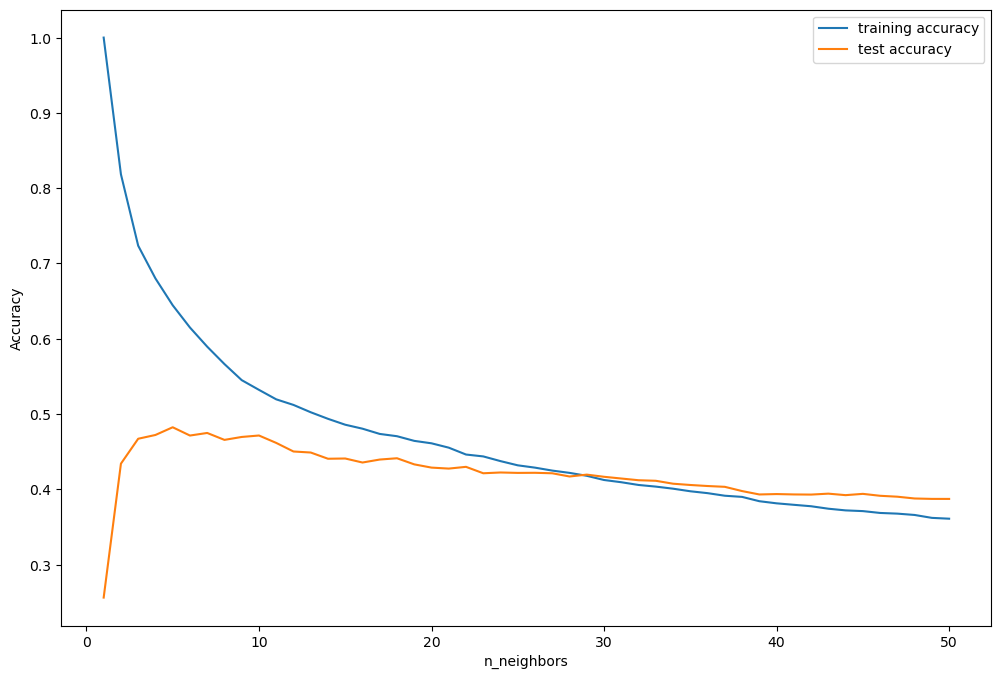

The optimal number of neighbors is 5


In [277]:
# K-Nearest Neighbors Tuning

# Initialize lists to store accuracy scores for the training and test datasets.
# These lists will help in assessing how the model's performance varies with the number of neighbors.
training_accuracy = []
test_accuracy = []

# Define a range of values for 'n_neighbors' to explore the impact of this parameter on model accuracy.
# We will investigate values from 1 to 50 to understand how increasing the number of neighbors affects accuracy.
neighbors_settings = range(1, 51)

# Loop through each possible number of neighbors to train and evaluate a KNN model with that specific count.
for n_neighbors in neighbors_settings:
    # Instantiate the KNeighborsRegressor model with the current number of neighbors.
    # Each iteration creates a new model with a different 'n_neighbors' parameter value.
    clf = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Fit the model to the training data. This step involves storing the features and target variable
    # from the training set to use for making predictions.
    clf.fit(x_train, y_train)
    
    # Calculate and record the training accuracy for the current model.
    # Training accuracy measures how well the model fits the data it was trained on.
    training_accuracy.append(clf.score(x_train, y_train))
    
    # Calculate and record the test accuracy for the current model.
    # Test accuracy assesses the model's ability to generalize to new, unseen data.
    test_accuracy.append(clf.score(x_test, y_test))

# Visualize the impact of 'n_neighbors' on training and test set accuracy.
# This plot helps in identifying the optimal number of neighbors that balances
# between overfitting and underfitting, showcasing the trade-off.
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()


# Determine the optimal number of neighbors for the KNN model.
# The optimal number is identified by finding the index of the maximum test accuracy
# observed during the model evaluation across different 'n_neighbors' values.
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1  # Since Python lists are zero-indexed, 1 is added to the index to match the actual number of neighbors.

# Print the optimal number of neighbors. This value represents the count of neighbors
# that resulted in the highest test accuracy, suggesting the best generalization performance
# of the KNN model on unseen data. It's crucial for tuning the model to achieve a balance
# between overfitting and underfitting, thereby enhancing predictive accuracy.
print(f"""The optimal number of neighbors is {opt_neighbors}""")


In [330]:
# Decision Tree Regressor tuning

# Define hyperparameter space into a dictionary for RandomizedSearchCV
param_grid = {
    'criterion': ["mae", "friedman_mse", "mse"],
    'max_depth': [None, 2, 8, 16],
    'min_samples_split': [2, 6, 12], 
    'min_samples_leaf': [2, 4, 8, 16]
}

# Instantiate the model for tuning
tuned_tree = DecisionTreeRegressor(random_state=219)

# Configure RandomizedSearchCV
tuned_tree_cv = RandomizedSearchCV(estimator=tuned_tree,
                                   param_distributions=param_grid,
                                   cv=3,
                                   n_iter=2000,
                                   random_state=702)

# Fit RandomizedSearchCV to the training data
tuned_tree_cv.fit(x_train, y_train)

# Print the best parameters and the corresponding score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training Score:", tuned_tree_cv.best_score_.round(4))

# Reset the train and test data since RandomizedSearchCV modifies them
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.25, 
                                                    random_state=218)

# Using the best parameters from the tuning process to instantiate a new model
best_params = tuned_tree_cv.best_params_
model = DecisionTreeRegressor(random_state=219, **best_params)

# Fit the model with best parameters to the training data
model_fit = model.fit(x_train, y_train)

# Evaluate and display the model's performance with the tuned parameters
model_train_score = model.score(x_train, y_train).round(4)
model_test_score = model.score(x_test, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# Summarizing the model's performance after tuning
print(f"""
Model Name:     Decision Tree Regressor (Tuned)
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
""")


Tuned Parameters  : {'min_samples_split': 2, 'min_samples_leaf': 8, 'max_depth': None, 'criterion': 'friedman_mse'}
Tuned Training Score: 0.7258

Model Name:     Decision Tree Regressor (Tuned)
Train_Score:    0.8866
Test_Score:     0.7668
Train-Test Gap: 0.1198



# Final Model Selection

After an extensive fine-tuning and evaluation process, the best model is the final one that I tuned, the DecisionTreeRegressor.  
My choice is underlined by several reasons:

- Consistent performance: interestingly, the training and test scores after tuning - 0.8866 and 0.7668, respectively - were consistent with the performance of the model before the tuning process. This consistency indicates that the predictive power of the model was robust from the beginning and that the fine-tuning served to reinforce the initial configuration rather than to change it.

- Generalisation capacity: the train-test gap of 0.1198 is indicative of a model that, while not perfect, offers a solid balance between fitting to training data and generalising to unseen data. Notably, this gap remained unchanged before and after fine-tuning, confirming the stability of the model.

- Optimisation of the hyper-parameters: the final parameters of the model were determined through a meticulous RandomizedSearchCV tuning process. The fact that the performance metrics remained unchanged even after fine-tuning suggests that the default parameters were already near-optimal, and the fine-tuning process reinforced my confidence in the parameterisation of the model.


In [357]:
# Identifying all potential features by excluding the target variable 'RENTALS' from the dataset.
# This list will be used for exploratory analysis or alternative model training scenarios.
x_all = list(train_df.drop(labels=['RENTALS'], axis=1).columns)

# Defining a specific subset of features selected based on domain knowledge, 
# preliminary data analysis, or feature importance metrics. 
# These features are believed to have a significant impact on the number of bike rentals.
x_features = ['Temperature(F)', 'Humidity(%)', 'Wind speed (mph)', 'Visibility(miles)', 'DewPointTemperature(F)', 'Rainfall(in)', 'Snowfall(in)', 'SolarRadiation(MJ/m2)', 'Holiday', 'FunctioningDay', 'hour', 'day_of_week', 'month', 'temp_category', 'humidity_level']
# Setting the target variable for prediction, which is the number of bike rentals.
# This is the variable that our model aims to predict based on the features.
original_y = train_df['RENTALS']

# Extracting the feature subset from the original DataFrame to use for model training.
# This DataFrame ('x_data') will serve as the input for our predictive models.
x_data = train_df[x_features]

# Assigning the target variable data to 'y_data', which will be used as the output for model training.
y_data = original_y

# Splitting the dataset into training and testing sets to validate the performance of our predictive models.
# A test size of 25% means that 75% of the data will be used for training, and 25% for testing.
# The 'random_state' ensures reproducibility of our train-test split.
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                              y_data, 
                                              test_size=0.25, 
                                              random_state=218)
model.fit(x_data, y_data)

DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=8,
                      random_state=219)

In [363]:
# Specifying the path and file name for the test dataset
test_file = './test.xlsx'
# Reading the Excel file into a pandas DataFrame
test_df = pd.read_excel(io     = test_file,
                        header = 0)
preprocess_data(test_df)
add_features(test_df)
x_test = test_df[x_features]

ID                         0
DateHour                   0
Temperature(F)             0
Humidity(%)                0
Wind speed (mph)           0
Visibility(miles)         13
DewPointTemperature(F)    16
Rainfall(in)               0
Snowfall(in)               0
SolarRadiation(MJ/m2)     26
Holiday                    0
FunctioningDay             0
dtype: int64
ID                        0
DateHour                  0
Temperature(F)            0
Humidity(%)               0
Wind speed (mph)          0
Visibility(miles)         0
DewPointTemperature(F)    0
Rainfall(in)              0
Snowfall(in)              0
SolarRadiation(MJ/m2)     0
Holiday                   0
FunctioningDay            0
dtype: int64
   hour  day_of_week  month  temp_category  humidity_level  time_of_day
0    20            5      9              2               2            4
1    17            5      9              1               1            3
2     0            0      9              1               1            0
3 

In [364]:
# Generating predictions for the test dataset using the trained model
y_predicted = model.predict(x_test)

In [365]:
# Creating a DataFrame to hold the IDs and their corresponding predicted rental counts
# This is typically required for submission in the specified format for competitions
submission_df = pd.DataFrame(
    {
        'ID': test_df.ID,        # Including IDs from the test set for reference
        'RENTALS': y_predicted   # The predicted rental counts from the model
    }
)


In [366]:
# Display the first five rows of the Dataframe
submission_df.head()

,ID,RENTALS
0,mb_382,1562.333333
1,mb_547,1991.111111
2,mb_578,772.384615
3,mb_187,1991.111111
4,mb_227,976.500000


In [367]:
# Saving the submission DataFrame to a CSV file without an index column
# This CSV file will be used for submitting the results
submission_df.to_csv('submission.csv', index=False)